# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [565]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2 Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

Load **all_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

Hint: Use `pd.read_csv()`


In [566]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP,population
0,Chile,2000,77.3,7.786093e+10,15342353
1,Chile,2001,77.3,7.097992e+10,15516113
2,Chile,2002,77.8,6.973681e+10,15684409
3,Chile,2003,77.9,7.564346e+10,15849652
4,Chile,2004,78.0,9.921039e+10,16014971


In [567]:
df['GDP_kapital'] = df.GDP / df.population
df.head()

,Country,Year,Life expectancy at birth (years),GDP,population,GDP_kapital
0,Chile,2000,77.3,7.786093e+10,15342353,5074.901624
1,Chile,2001,77.3,7.097992e+10,15516113,4574.594421
2,Chile,2002,77.8,6.973681e+10,15684409,4446.250505
3,Chile,2003,77.9,7.564346e+10,15849652,4772.562820
4,Chile,2004,78.0,9.921039e+10,16014971,6194.853107


## Step 3 Examine The Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What six countries are represented in the data?

In [568]:
countries = df.Country.unique()
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


What years are represented in the data?

In [569]:
years = df.Year.unique()
print(years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Step 4 Tweak The DataFrame

Look at the column names of the DataFrame `df` using `.head()`. 

In [570]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP,population,GDP_kapital
0,Chile,2000,77.3,7.786093e+10,15342353,5074.901624
1,Chile,2001,77.3,7.097992e+10,15516113,4574.594421
2,Chile,2002,77.8,6.973681e+10,15684409,4446.250505
3,Chile,2003,77.9,7.564346e+10,15849652,4772.562820
4,Chile,2004,78.0,9.921039e+10,16014971,6194.853107


What do you notice? 

The first two column names are one word each, and the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. 

**Revise The DataFrame Part A:** 

Use Pandas to change the name of the last column to `LEABY`.

Hint: Use `.rename()`. [You can read the documentation here.](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)). </font>

In [571]:
df.rename(columns = {'Life expectancy at birth (years)' : 'LEABY'}, inplace = True)

Run `df.head()` again to check your new column name worked.

In [572]:
df.head()

,Country,Year,LEABY,GDP,population,GDP_kapital
0,Chile,2000,77.3,7.786093e+10,15342353,5074.901624
1,Chile,2001,77.3,7.097992e+10,15516113,4574.594421
2,Chile,2002,77.8,6.973681e+10,15684409,4446.250505
3,Chile,2003,77.9,7.564346e+10,15849652,4772.562820
4,Chile,2004,78.0,9.921039e+10,16014971,6194.853107


In [573]:
df['Country'].replace({'United States of America' : 'USA'}, inplace = True)
#df[df.Country == 'USA']

---

## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 
Remember to `plt.show()` your chart!

In [574]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

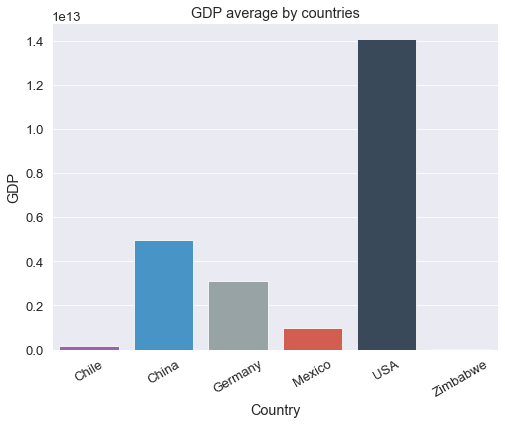

In [575]:
f, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = df, x = 'Country', y = 'GDP', ci = None)
sns.set_palette(flatui)
plt.xticks(rotation = 30)
plt.title('GDP average by countries')
plt.savefig('GDP_average.png')
plt.show()

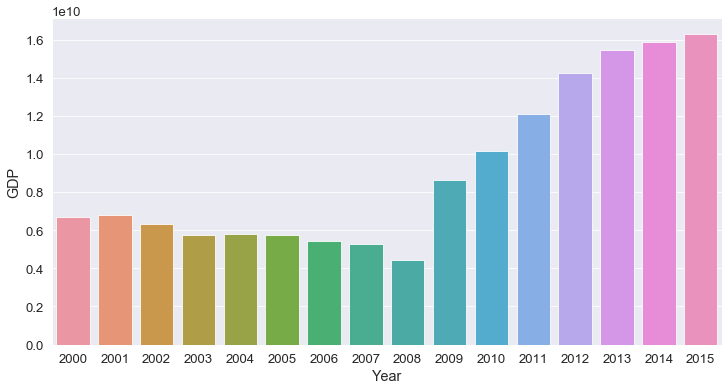

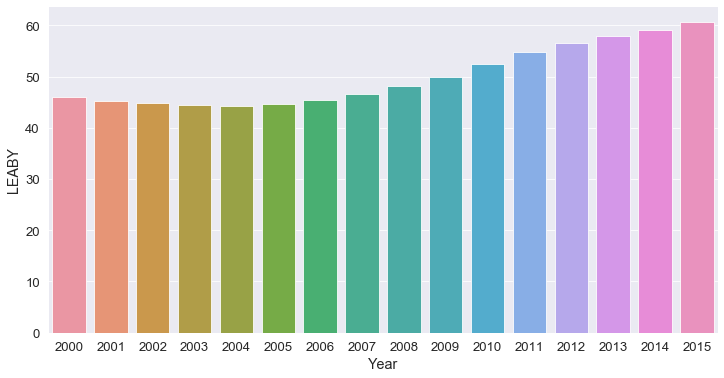

In [576]:
zimbabwe = df[df.Country == 'Zimbabwe']
f, ax = plt.subplots(figsize = (12, 6))
sns.set_palette(flatui)
sns.barplot(data = zimbabwe, x = 'Year', y = 'GDP')
plt.show()
f, ax = plt.subplots(figsize = (12, 6))
sns.barplot(data = zimbabwe, x = 'Year', y = 'LEABY')
plt.show()

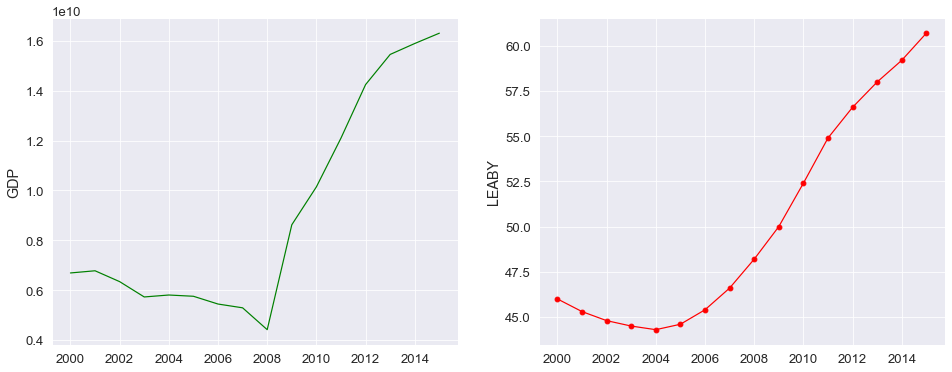

In [577]:
# create inout data
x = zimbabwe['Year']
y1 = zimbabwe['GDP']
y2 = zimbabwe['LEABY']
# resize the figure 
plt.figure(figsize = (16,6))
#left chart
plt.subplot(1, 2, 1)
plt.plot(x, y1, color = 'green')
plt.ylabel('GDP')

# right chart
plt.subplot(1, 2, 2)
plt.plot(x, y2, color = 'red', marker = 'o')
plt.ylabel('LEABY')
plt.show()

B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.
Remember to `plt.show()` your chart!

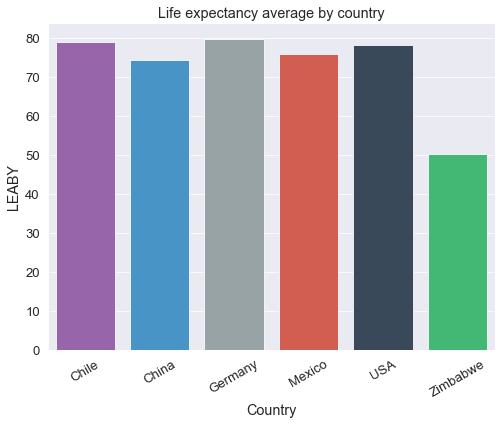

In [578]:
f, ax = plt.subplots(figsize = (8, 6))
sns.set_palette(flatui)
sns.barplot(data = df, x = 'Country', y = 'LEABY', ci = None)
plt.xticks(rotation = 30)
plt.title('Life expectancy average by country')
plt.savefig('life_expectancy_average_by_country.png')
plt.show()

In [579]:
df[df.Country == 'Zimbabwe'].LEABY.mean()

50.09375000000001

What do you notice about the two bar charts? Do they look similar?

First plot countries by GDP, US is far from rest of the countries by average year GDP, second plot countries by life expectance the average of life expectance at birth is homogeneous for first 5 countries excepting Zimbabwe. 
Conclusion is that the ratio between countries GDP is not in concordance with Life expectance, a good example is US and Chile.
It is also a good point to take in consideration for GDP the number of population. 

In [580]:
# average GDP
unique = df['Country'].unique()
avg_gdp = []
for i in unique:
    mean = df[df.Country == i].GDP.mean()
    avg_gdp.append(mean)
df_avg = pd.DataFrame({'country': unique, 'average_GDP' : avg_gdp})
df_avg

,country,average_GDP
0,Chile,1.698395e+11
1,China,4.961250e+12
2,Germany,3.095000e+12
3,Mexico,9.762500e+11
4,USA,1.407500e+13
5,Zimbabwe,9.062580e+09


In [581]:
# average LEABY
unique = df['Country'].unique()
avg_gdp = []
for i in unique:
    mean = df[df.Country == i].LEABY.mean()
    avg_gdp.append(mean)

df_avg = pd.DataFrame({'country': unique, 'average_LEABY' : avg_gdp})
df_avg

,country,average_LEABY
0,Chile,78.94375
1,China,74.26250
2,Germany,79.65625
3,Mexico,75.71875
4,USA,78.06250
5,Zimbabwe,50.09375


In [582]:
leaby_ratio_countries = []
gdp_ratio_countries = []
for i in unique:
    ratio_leaby = ((df[(df.Country == i) & (df.Year == 2015)].LEABY.max() - df[(df.Country == i) & (df.Year == 2000)].LEABY.max()) /  
                    df[(df.Country == i) & (df.Year == 2000)].LEABY.max()) * 100
    
    leaby_ratio_countries.append(ratio_leaby)
    
    ratio_gdp = ((df[(df.Country == i) & (df.Year == 2015)].GDP.max() - df[(df.Country == i) & (df.Year == 2000)].GDP.max()) /  
                    df[(df.Country == i) & (df.Year == 2000)].GDP.max()) * 100
    
    gdp_ratio_countries.append(ratio_gdp)
    

df_ratio = pd.DataFrame({'country' : unique, 'ratio_LEABY' : leaby_ratio_countries, 'ratio_GDP' : gdp_ratio_countries})
df_ratio

,country,ratio_LEABY,ratio_GDP
0,Chile,4.139715,212.094902
1,China,6.136681,817.355372
2,Germany,3.846154,73.333333
3,Mexico,2.540107,68.128655
4,USA,3.255208,75.728155
5,Zimbabwe,31.956522,143.718552


## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

We have added the code to instantiate a figure with the correct dimmensions to observe detail. 
1. Create an `sns.violinplot()` for the dataframe `df` and map `Country` and `LEABY` as its respective `x` and `y` axes. 
2. Be sure to show your plot

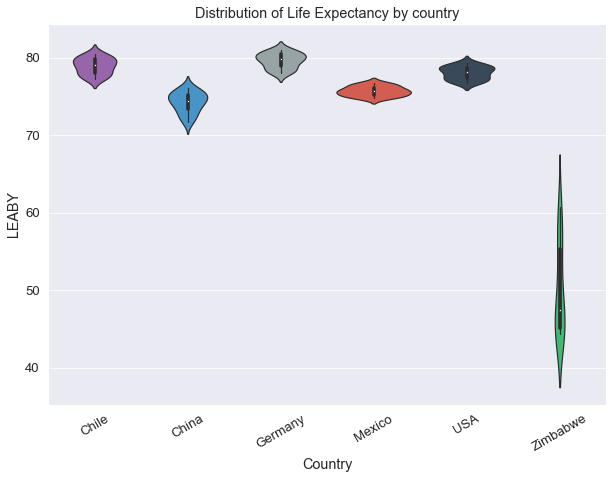

In [585]:
fig = plt.subplots(figsize=(10, 7))
sns.set_style('whitegrid')
sns.set_palette(flatui)
sns.set_context('paper', font_scale = 1.5)
sns.violinplot(data = df, x= 'Country', y = 'LEABY')
plt.xticks(rotation = 30)
plt.title('Distribution of Life Expectancy by country')
#sns.despine(bottom = True, left = True)
plt.savefig('distribution_by_country.png')
plt.show()

What do you notice about this distribution? Which country's life expactancy has changed the most?
- Zimbabwe indicate an wide range of change in life expectancy between 2000 and 2015.  

## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, can plot the progession of GDP's over the years by country in a barplot using Seaborn.
We have set up a figure with the correct dimensions for your plot. Under that declaration:
1. Save `sns.barplot()` to a variable named `ax`
2. Chart `Country` on the x axis, and `GDP` on the `Y` axis on the barplot. Hint: `ax = sns.barplot(x="Country", y="GDP")`
3. Use the `Year` as a `hue` to differentiate the 15 years in our data. Hint: `ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)`
4. Since the names of the countries are long, let's rotate their label by 90 degrees so that they are legible. Use `plt.xticks("rotation=90")`
5. Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to `"GDP in Trillions of U.S. Dollars"`. Hint: `plt.ylabel("GDP in Trillions of U.S. Dollars")`
6. Be sure to show your plot.


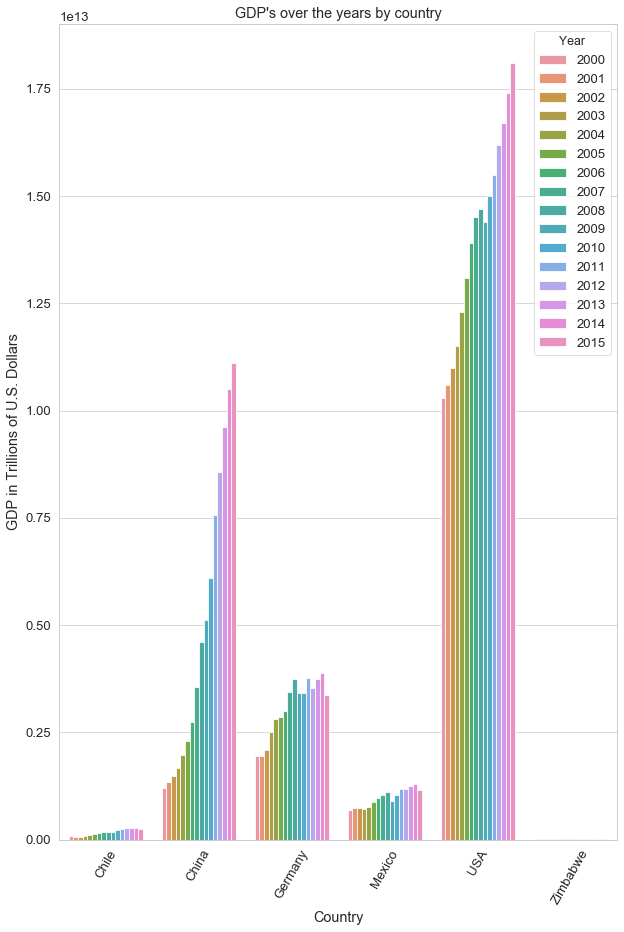

In [586]:
f, ax = plt.subplots(figsize=(10, 15)) 
sns.set_palette('pastel')
sns.barplot(data = df, x = 'Country', y = 'GDP', hue = 'Year')
plt.xticks(rotation = 60)
ax.set_ylabel("GDP in Trillions of U.S. Dollars")
ax.set_title("GDP's over the years by country")
plt.savefig('gdp_overtime.png')
plt.show()

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

The code will essentially be the same as above! The beauty of Seaborn relies in its flexibility and extensibility. Paste the code from above in the cell bellow, and: 
1. Change your `y` value to `LEABY` in order to plot life expectancy instead of GDP. Hint: `ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)`
2. Tweak the name of your `ylabel` to reflect this change, by making the label `"Life expectancy at birth in years"` Hint: `ax.set(ylabel="Life expectancy at birth in years")`


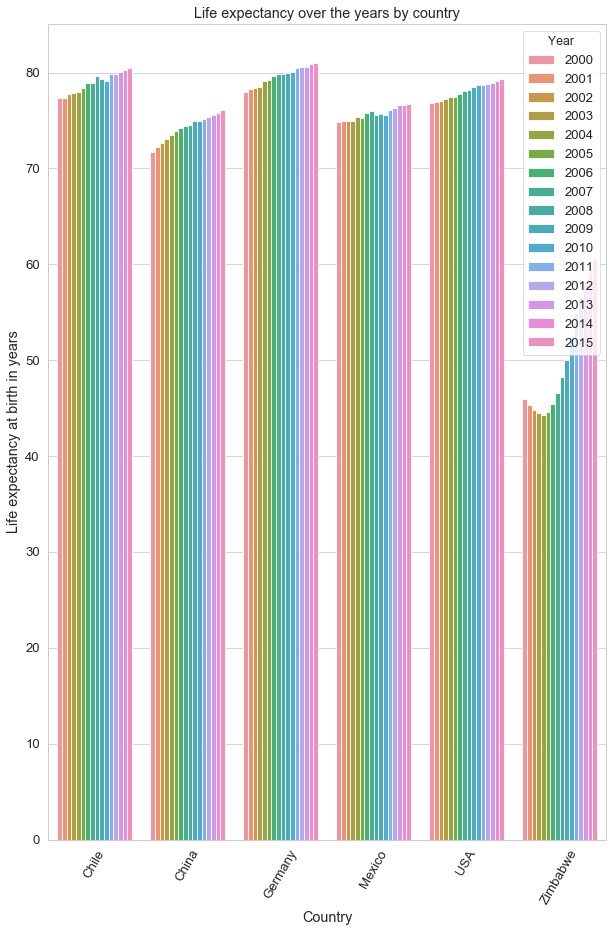

In [587]:
f, ax = plt.subplots(figsize=(10, 15)) 
sns.set_palette('pastel')
sns.barplot(data = df, x = 'Country', y = 'LEABY', hue = 'Year')
plt.xticks(rotation = 60)
ax.set(ylabel = "Life expectancy at birth in years")
ax.set_title("Life expectancy over the years by country")
#plt.savefig('leaby_overtime.png')
plt.show()

What are your first impressions looking at the visualized data?

- Which countries' bars changes the most?
  - For the last 10 yeras Germany GDP's has up and downs, life expectancy the bigest change is notticed by  Zimbabwe, between 2009 to 2015.
- What years are there the biggest changes in the data?
  - For life expectancy there is a constant increase year by year for Zimbabwe who faces a decline from 2000 to 2005.
  - GDP Chiana has a constant increase from 2010 to 2015
- Which country has had the least change in GDP over time? 
  - Zimbabwe
- How do countries compare to one another?
  - USA and China are countries with highest change in GDP per year, but China has the most constant increase by year, on the other hand Zimbabwe has the smallest GDP and lifeexpectancy.
- Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?
  - Compare One by one chart for each country, reletionship betwenn GDP and life expectancy depends out of the country, for example Zimbabwe both plots have same shape, conclude that there is a relationship between GDP and life expactance, on the other hand developed country like Germany life expectancy has a constant increase independ from GDP income per year. 
- Can you think of any reasons that the data looks like this for particular countries?
  - Good comparation would be GDP per capital in relation with life expectance

**GDP over global crisis 2008 - 2010**

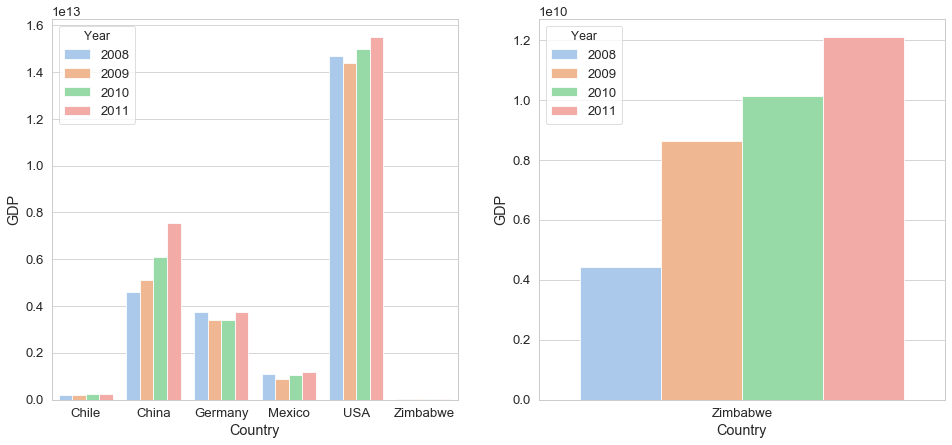

In [588]:

recesion = df[(df.Year >= 2008) & (df.Year <= 2011)]
zimbabwe = recesion[recesion.Country == 'Zimbabwe']

plt.figure(figsize = (16, 7))
plt.subplot(1, 2, 1)
sns.barplot(data = recesion, x = 'Country', y = 'GDP', hue = 'Year')
plt.subplot(1, 2, 2)
sns.barplot(data = zimbabwe, x = 'Country', y = 'GDP', hue = 'Year')
plt.show()

Note: You've mapped two bar plots showcasing a variable over time by country, however, bar charts are not traditionally used for this purpose. In fact, a great way to visualize a variable over time is by using a line plot. While the bar charts tell us some information, the data would be better illustrated on a line plot.  We will complete this in steps 9 and 10, for now let's switch gears and create another type of chart.

## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!
    
Since this may be the first time you've learned about FacetGrid, we have prepped a fill in the blank code snippet below. 
Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


Be sure to show your plot!


In [ ]:
# WORDBANK:
# "Year"
# "Country" 
# "GDP" 
# "LEABY" 
# plt.scatter


# Uncomment the code below and fill in the blanks
sns.set_palette('colorblind')
g = sns.FacetGrid(df, col= 'Year', hue= 'Country', col_wrap=4, size = 2)
g = (g.map_dataframe(sns.scatterplot, 'GDP', 'LEABY', edgecolor="w", s = 80).add_legend())
plt.savefig('gdp_leaby.png')
plt.show()

In [ ]:
g = sns.FacetGrid(df, col = 'Country', hue = 'Year', col_wrap = 3, size = 3)
g = (g.map(plt.scatter, 'Year', 'LEABY', ).add_legend())

In [ ]:
g = sns.FacetGrid(df, col = 'Country', hue = 'Year', col_wrap = 3, size = 4)
g = (g.map(plt.bar, 'Year', 'GDP', ).add_legend())

+ Which country moves the most along the X axis over the years?
  - US and China 
+ Which country moves the most along the Y axis over the years?
  - All countries beside Mexico move up to Y axis but Zimbabwe has a tremendous increase in life expectence.
+ Is this surprising?
  - No
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 
  - i have tried other plots but scatter is suitable to observe changes between GDP and life expectancy

In [ ]:
df_leaby = df[df['LEABY'] == 75]
df_leaby

In [ ]:
df['Country'].unique()

## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 

FacetGrid also allows you to do that! Instead of passing in `plt.scatter` as your Matplotlib function, you would have to pass in `plt.plot` to see a line graph. A few other things have to change as well. So we have created a different codesnippets with fill in the blanks.  that makes use of a line chart, and we will make two seperate FacetGrids for both GDP and Life Expectancy separately.

Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up by Country
3. We want to use a Matplotlib line plot to visualize the different graphs


Be sure to show your plot!



In [ ]:
# WORDBANK:
# plt.plot
# "LEABY"
# "Year"
# "Country"

# Uncomment the code below and fill in the blanks
sns.set_style('whitegrid')
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=3)
g3 = (g3.map(plt.plot, "Year", "LEABY", palette = flatui).add_legend())
#plt.savefig('LEABY_by_country.png')
plt.show()

What are your first impressions looking at the visualized data?

- Which countries' line changes the most?
  - Zimbabwe
- What years are there the biggest changes in the data?
  - 2005 to 2015
- Which country has had the least change in life expectancy over time? 
  - Mexico
- Can you think of any reasons that the data looks like this for particular countries?
  -

In [ ]:
# Which country has had the least change in life expectancy over time?
year_range = []
for i in unique:
    df_country = df[df['Country'] == i]
    ranges = df_country.LEABY.max() - df_country.LEABY.min()
    year_range.append(ranges)

df_range_leaby = pd.DataFrame({'country' : unique, 'leaby_over_time' : year_range})
df_range_leaby

## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


In [ ]:
sns.set_style('darkgrid')
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=3)
g3 = (g3.map(plt.plot, "Year", "GDP").add_legend())
plt.savefig('gdp_by_country.png')
plt.show()

Which countries have the highest and lowest GDP?

Us has the highest GDP and Zimbabwe the lowest.

Which countries have the highest and lowest life expectancy?

Germany Chile and US has the highest life expectancy but Germany shows little better life expectancy than others two and lowest life expectancy is indicated by Zimbabwe. 

## Step 11 Researching Data Context 

Based on the visualization, choose one part the data to research a little further so you can add some real world context to the visualization. You can choose anything you like, or use the example question below.

What happened in China between in the past 10 years that increased the GDP so drastically?

## Step 12 Create Blog Post

Use the content you have created in this Jupyter notebook to create a blog post reflecting on this data.
Include the following visuals in your blogpost:

1. The violin plot of the life expectancy distribution by country
2. The facet grid of scatter graphs mapping GDP as a function Life Expectancy by country
3. The facet grid of line graphs mapping GDP by country
4. The facet grid of line graphs mapping Life Expectancy by country


We encourage you to spend some time customizing the color and style of your plots! Remember to use `plt.savefig("filename.png")` to save your figures as a `.png` file.

When authoring your blog post, here are a few guiding questions to guide your research and writing:
+ How do you think the histories and the cultural values of each country relate to its GDP and life expectancy?
+ What would have helped make the project data more reliable? What were the limitations of the dataset?
+ Which graphs better illustrate different relationships??

In [ ]:
sns.set_style('whitegrid')
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=3)
g3 = (g3.map(plt.plot, "Year", "GDP_kapital").add_legend())
#plt.savefig('LEABY_by_country.png')
plt.show()

**Calculate the GDP per kapital**

Download the population for each country between 200 and 2015, create a new column for calculating the GDP per kapital, divide GDP income by number of population for each year, the result indicate the yearly income for one individual person. 

In [ ]:
china = df[df.Country == 'Germany']
x = china.Year
y1 = china.GDP
y2 = china.GDP_kapital
y3 = china.population
plt.figure(figsize = (20, 6))
#first plot
plt.subplot(1, 3, 1)
plt.plot( x, y1, color = 'green', marker = 'o')
plt.xticks(x, rotation = 90)
plt.title('GDP by year')
plt.xlabel('Year')
# second plot 
plt.subplot(1, 3, 2)
plt.plot(x,  y2, color = 'orange', marker = 'o')
plt.xticks(x, rotation = 90)
plt.title('GDP per kapital by year')
plt.xlabel('Year')
# third plot
plt.subplot(1, 3, 3)
plt.plot(x,  y3, color = 'blue',marker = 'o')
plt.xticks(x, rotation = 90)
plt.title('Population by year')
plt.xlabel('Year')
plt.show()